<a href="https://colab.research.google.com/github/Shak97/Attention-Network-with-Tversky-Loss/blob/master/attention_cnn_with_tversky_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


##Dependencies

In [0]:
import numpy as np
import keras
from keras.optimizers import *
from keras.models import *
from keras.layers import *
import os
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf

Using TensorFlow backend.


##Files Path

In [0]:
train_dir = '/content/drive/My Drive/h_segmentation/train_image/images/'
train_mask = '/content/drive/My Drive/h_segmentation/train_mask/labels/'

##Reading Files name from Directory

In [0]:
fil = os.listdir(train_dir)

In [0]:
fil.sort()
templist = []
sublist = []
m = 0
start = 0

for i in range(len(fil)):
    if fil[start][3:6] == fil[i][3:6]:
        templist.append(fil[i])
    else:
        sublist.append('')
        sublist[m] = templist.copy()
        m+=1
        templist.clear()
        templist.append(fil[i])
        start = i
sublist.append('')
sublist[m] = templist.copy()

######SORTING SECOND PART######
for eachlist in sublist:
    for i in range(len(eachlist)):
        eachlist[i] = eachlist[i].split('.')[0]

for ls in sublist:
    for i in range(len(ls)):
        min = int(ls[i][11:])
        minindex = i
        for j in range(i+1, len(ls)):
            if min > int(ls[j][11:]):
                min = int(ls[j][11:])
                minindex = j
        temp = ls[i]
        ls[i] = ls[minindex]
        ls[minindex] = temp

####ADDDING EXTENSION PNG
for x in sublist:
    for y in range(len(x)):
        x[y] = x[y] + '.png'

In [0]:
n = [] 
  
# function used for removing nested  
# lists in python.  
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            n.append(i) 

In [0]:
reemovNestings(sublist)

##Reading Dataset/Mri Slices

In [0]:
X = []
for im in n:
  X.append(cv2.resize(cv2.imread(train_dir+im,cv2.IMREAD_GRAYSCALE),(240,240)))

In [0]:
X = np.asarray(X)
X.shape

(2251, 240, 240)

In [0]:
x_train = []
x_val = []
x_test = []
for i in range(1578):
  x_train.append(X[i])
for i in range(1578,1578+218):
  x_val.append(X[i])
for i in range(1796,1796+455):
  x_test.append(X[i])
  
x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
x_test = np.asarray(x_test)

In [0]:
x_train = x_train.reshape(1578,240,240,1)
x_train.shape

(1578, 240, 240, 1)

In [0]:
x_val = x_val.reshape(218,240,240,1)
x_val.shape

(218, 240, 240, 1)

In [0]:
x_test = x_test.reshape(455,240,240,1)
x_test.shape

(455, 240, 240, 1)

In [0]:
fil = os.listdir(train_mask)

In [0]:
fil.sort()
templist = []
sublist = []
m = 0
start = 0

for i in range(len(fil)):
    if fil[start][3:6] == fil[i][3:6]:
        templist.append(fil[i])
    else:
        sublist.append('')
        sublist[m] = templist.copy()
        m+=1
        templist.clear()
        templist.append(fil[i])
        start = i
sublist.append('')
sublist[m] = templist.copy()

######SORTING SECOND PART######
for eachlist in sublist:
    for i in range(len(eachlist)):
        eachlist[i] = eachlist[i].split('.')[0]

for ls in sublist:
    for i in range(len(ls)):
        min = int(ls[i][11:])
        minindex = i
        for j in range(i+1, len(ls)):
            if min > int(ls[j][11:]):
                min = int(ls[j][11:])
                minindex = j
        temp = ls[i]
        ls[i] = ls[minindex]
        ls[minindex] = temp

####ADDDING EXTENSION PNG
for x in sublist:
    for y in range(len(x)):
        x[y] = x[y] + '.png'

In [0]:
n = [] 
  
# function used for removing nested  
# lists in python.  
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            n.append(i) 

In [0]:
reemovNestings(sublist)

In [0]:
Y = []
for mask in n:
  Y.append(cv2.resize(cv2.imread(train_mask+mask, cv2.IMREAD_GRAYSCALE),(240,240)))
  

In [0]:
Y = np.asarray(Y)
Y.shape

(2251, 240, 240)

In [0]:
y_train = []
y_val = []
y_test = []
for i in range(1578):
  y_train.append(Y[i])
for i in range(1578,1578+218):
  y_val.append(Y[i])
for i in range(1796,1796+455):
  y_test.append(Y[i])
  
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [0]:
y_train = y_train.reshape(1578,240,240,1)
y_train.shape

(1578, 240, 240, 1)

In [0]:
y_val = y_val.reshape(218,240,240,1)
y_val.shape

(218, 240, 240, 1)

In [0]:
y_test = y_test.reshape(455,240,240,1)
y_test.shape

(455, 240, 240, 1)

In [0]:
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
y_train = y_train.astype('float32')
y_val = y_val.astype('float32')
y_test = y_test.astype('float32')
for i in range(1578):
  x_train[i,:,:] = x_train[i,:,:] / 255.0
  y_train[i,:,:] = y_train[i,:,:] / 255.0
for i in range(218):
  x_val[i,:,:] = x_val[i,:,:] / 255.0
  y_val[i,:,:] = y_val[i,:,:] / 255.0
for i in range(455):
  x_test[i,:,:] = x_test[i,:,:] / 255.0
  y_test[i,:,:] = y_test[i,:,:] / 255.0



In [0]:
x_train = np.asarray(x_train)
x_val = np.asarray(x_val)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)
y_test = np.asarray(y_test)

In [0]:
gt1 = y_train[:,::8,::8,:]
gt2 = y_train[:,::4,::4,:]
gt3 = y_train[:,::2,::2,:]
gt4 = y_train
yy_train = [gt1,gt2,gt3,gt4]

yv1 = y_val[:,::8,::8,:]
yv2 = y_val[:,::4,::4,:]
yv3 = y_val[:,::2,::2,:]
yv4 = y_val
yy_val = [yv1,yv2,yv3,yv4]


In [0]:
yt1 = y_test[:,::8,::8,:]
yt2 = y_test[:,::4,::4,:]
yt3 = y_test[:,::2,::2,:]
yt4 = y_test
yy_test = [yt1,yt2,yt3,yt4]


##Model

In [0]:
import keras.backend as K
def gatingSignal(inp):
  shape = K.int_shape(inp)
  x = Conv2D(shape[3] * 1, (1, 1), activation='relu', padding='same')(inp)
  x = BatchNormalization()(x)
  return x

In [0]:
def expend_as(tens, rep):
  my_rep = Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3), arguments={'repnum': rep})(tens)
  return my_rep

In [0]:
def gatingBlock(x, g, filt):
  shape_x = K.int_shape(x)
  shape_g = K.int_shape(g)
  
  conv_x = Conv2D(filt, (2,2), activation='relu', padding='same')(x)
  shape_conv_x = K.int_shape(conv_x)
  
  conv_g = Conv2D(filt, (1,1), activation='relu', padding='same')(g)
  up_g = Conv2DTranspose(filt, (3,3), strides=(shape_conv_x[1] // shape_g[1], shape_conv_x[2] // shape_g[2]), activation='relu', padding='same')(conv_g)
  
  add_xg = add([up_g, conv_x])
  act_xg = Activation('relu')(add_xg)
  psi = Conv2D(1, (1,1), activation='sigmoid', padding='same')(act_xg)
  shape_psi = K.int_shape(psi)
  up_psi = UpSampling2D(size=(shape_x[1] // shape_psi[1], shape_x[2] // shape_psi[2]))(psi)

  up_psi = expend_as(up_psi, shape_x[3])
  y = multiply([up_psi, x])
  
  result = Conv2D(shape_x[3], (1,1), padding='same')(y)
  result = BatchNormalization()(result)
  
  return result
  

In [0]:
def tversky(y_true, y_pred):
    smooth=1
    y_true_pos = K.flatten(y_true)
    y_pred_pos = K.flatten(y_pred)
    true_pos = K.sum(y_true_pos * y_pred_pos)
    false_neg = K.sum(y_true_pos * (1-y_pred_pos))
    false_pos = K.sum((1-y_true_pos)*y_pred_pos)
    alpha = 0.7
    return (true_pos + smooth)/(true_pos + alpha*false_neg + (1-alpha)*false_pos + smooth)


In [0]:
def focal_tversky(y_true,y_pred):
  pt_1 = tversky(y_true, y_pred)
  gamma = 0.75
  return K.pow((1-pt_1), gamma)

def dsc(y_true, y_pred):
    smooth = 1.
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return score


In [0]:
def attn_unet(pretrained_weights = None, input_size = (240,240,1)):
  scale_1 = keras.engine.input_layer.Input(input_size)
  scale_2 = AveragePooling2D(pool_size=(2,2))(scale_1)
  scale_3 = AveragePooling2D(pool_size=(2,2))(scale_2)
  scale_4 = AveragePooling2D(pool_size=(2,2))(scale_3)
  
  #ENCODER
  conv1 = Conv2D(32, (3,3), activation = 'relu', padding='same')(scale_1)
  conv1 = BatchNormalization()(conv1)
  conv1 = Conv2D(32, (3,3), activation = 'relu', padding='same')(conv1)
  conv1 = BatchNormalization()(conv1)
  pool1 = MaxPooling2D(pool_size = (2,2))(conv1)
  
  conv2 = Conv2D(64,(3,3), activation='relu', padding='same')(scale_2)
  conv2 = concatenate([conv2, pool1], axis=3)
  conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(conv2)
  conv2 = BatchNormalization()(conv2)
  conv2 = Conv2D(64, (3,3), activation='relu', padding='same')(conv2)
  conv2 = BatchNormalization()(conv2)
  pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
  
  conv3 = Conv2D(128,(3,3), activation='relu', padding='same')(scale_3)
  conv3 = concatenate([conv3, pool2], axis=3)
  conv3 = Conv2D(128, (3,3), activation='relu', padding='same')(conv3)
  conv3 = BatchNormalization()(conv3)
  conv3 = Conv2D(128, (3,3), activation='relu', padding='same')(conv3)
  conv3 = BatchNormalization()(conv3)
  pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
  
  conv4 = Conv2D(256, (3,3), activation='relu', padding='same')(scale_4)
  conv4 = concatenate([conv4, pool3], axis=3)
  conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(conv4)
  conv4 = BatchNormalization()(conv4)
  conv4 = Conv2D(64, (3,3), activation='relu', padding='same')(conv4)
  conv4 = BatchNormalization()(conv4)
  pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
  
  #CENTER
  center = Conv2D(512, (3,3), activation='relu', padding='same')(pool4)
  center = BatchNormalization()(center)
  center = Conv2D(512, (3,3), activation='relu', padding='same')(pool4)
  center = BatchNormalization()(center)

  #DECODER
  gate1 = gatingSignal(center)
  blck1 = gatingBlock(conv4, gate1, 128)
  trans1 = Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same')(center)
  up1 = concatenate([trans1, blck1])
  
  gate2 = gatingSignal(up1)
  blck2 = gatingBlock(conv3, gate2, 64)
  trans2 = Conv2DTranspose(64, (3,3), strides=(2,2), activation='relu', padding='same')(up1)
  up2 = concatenate([trans2, blck2])
  
  gate3 = gatingSignal(up2)
  blck3 = gatingBlock(conv2, gate3, 32)
  trans3 = Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same')(up2)
  up3 = concatenate([trans3, blck3])
  
  trans4 = Conv2DTranspose(32, (3,3), strides=(2,2), activation='relu', padding='same')(up3)
  up4 = concatenate([trans4, conv1])
  
  conv6 = Conv2D(256, (3,3), activation='relu', padding='same')(up1) 
  conv6 = BatchNormalization()(conv6)
  conv6 = Conv2D(256, (3,3), activation='relu', padding='same')(conv6)
  conv6 = BatchNormalization()(conv6)
  
  conv7 = Conv2D(128, (3,3), activation='relu', padding='same')(up2) 
  conv7 = BatchNormalization()(conv7)
  conv7 = Conv2D(128, (3,3), activation='relu', padding='same')(conv7)
  conv7 = BatchNormalization()(conv7)
  
  conv8 = Conv2D(64, (3,3), activation='relu', padding='same')(up3) 
  conv8 = BatchNormalization()(conv8)
  conv8 = Conv2D(64, (3,3), activation='relu', padding='same')(conv8)
  conv8 = BatchNormalization()(conv8)
  
  conv9 = Conv2D(32, (3,3), activation='relu', padding='same')(up4) 
  conv9 = BatchNormalization()(conv9)
  conv9 = Conv2D(32, (3,3), activation='relu', padding='same')(conv9)
  conv9 = BatchNormalization()(conv9)
  
  out6 = Conv2D(1, (1,1), activation='sigmoid', name='pred1')(conv6)
  out7 = Conv2D(1, (1,1), activation='sigmoid', name='pred2')(conv7)
  out8 = Conv2D(1, (1,1), activation='sigmoid', name='pred3')(conv8)
  out9 = Conv2D(1, (1,1), activation='sigmoid', name='final')(conv9)
  
  model = Model(input = [scale_1], output=[out6, out7, out8, out9])
  
  loss={'pred1':focal_tversky,
        'pred2':focal_tversky,
        'pred3':focal_tversky,
        'final':focal_tversky}
  
  loss_weights={'pred1':1,
        'pred2':1,
        'pred3':1,
        'final':2}
  
  run_opts = tf.RunOptions(report_tensor_allocations_upon_oom = True)
  model.compile(optimizer=Adam(), loss = loss, loss_weights = loss_weights, metrics=[dsc])
  
  return model

In [0]:
model = attn_unet()

In [0]:
model_hist = model.fit(x_train, yy_train, epochs=8, validation_data=(x_val, yy_val))

In [0]:
model_hist.history.keys()

##Model Prediction

In [0]:
pred = model.predict(x=x_test, verbose=1)

In [0]:
#pred = np.asarray(pred)
pred4 = np.asarray(pred[3])
pred3 = np.asarray(pred[2])
pred2 = np.asarray(pred[1])
pred1 = np.asarray(pred[0])

In [0]:
pred1.shape

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras import backend as b
dice_pred4 = []
for i in range(455):
  dice_pred4.append(b.eval(dsc(yt4[i,:,:], pred4[i,:,:])))

In [0]:
for i in range(455):
  if dice_pred4[i] < 0.5:
    dice_pred4[i] = 0
  else:
    dice_pred4[i] = 1

In [0]:
d4=0
for i in range(len(dice_pred4)):
  d4+= dice_pred4[i]
d4

388

In [0]:
d4/455

In [0]:
dice_pred3 = []
for i in range(455):
  dice_pred3.append(b.eval(dsc(yt3[i,:,:], pred3[i,:,:])))

In [0]:
for i in range(455):
  if dice_pred3[i] < 0.5:
    dice_pred3[i] = 0
  else:
    dice_pred3[i] = 1

In [0]:
d3=0
for i in range(len(dice_pred3)):
  d3+= dice_pred3[i]
d3

In [0]:
d3/455

In [0]:
dice_pred2 = []
for i in range(455):
  dice_pred2.append(b.eval(dsc(yt2[i,:,:], pred2[i,:,:])))

In [0]:
for i in range(455):
  if dice_pred2[i] < 0.5:
    dice_pred2[i] = 0
  else:
    dice_pred2[i] = 1

In [0]:
d2=0
for i in range(len(dice_pred2)):
  d2+= dice_pred2[i]
d2

In [0]:
d2/455

In [0]:
dice_pred1 = []
for i in range(455):
  dice_pred1.append(b.eval(dsc(yt1[i,:,:], pred1[i,:,:])))

In [0]:
for i in range(455):
  if dice_pred1[i] < 0.5:
    dice_pred1[i] = 0
  else:
    dice_pred1[i] = 1

In [0]:
d1=0
for i in range(len(dice_pred1)):
  d1+= dice_pred1[i]
d1

In [0]:
d1/455

In [0]:
((d1/455)+(d2/455)+(d3/455)+(d4/455))/4

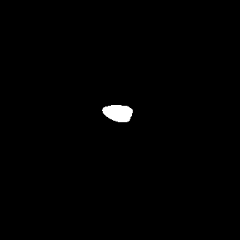

In [0]:
cv2_imshow(yt4[80,:,:,:].reshape(240,240)*255.0)

In [0]:
dice_pred4[80]

0

In [0]:
dice_pred4

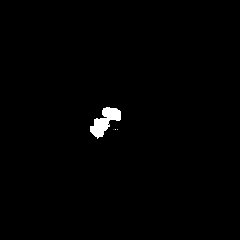

In [0]:
cv2_imshow(pred4[80,:,:,:].reshape(240,240)*255.0)

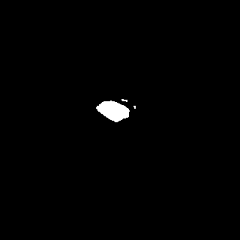

In [0]:
cv2_imshow(yt4[50,:,:,:].reshape(240,240)*255.0)

In [0]:
dice_pred4[50]

1

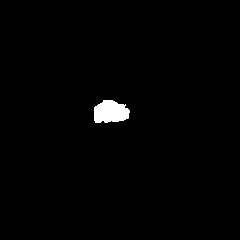

In [0]:
cv2_imshow(pred4[50,:,:,:].reshape(240,240)*255.0)

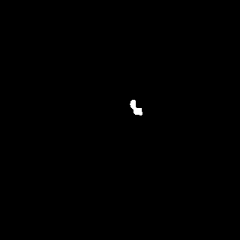

In [0]:
cv2_imshow(yt4[220,:,:,:].reshape(240,240)*255.0)

In [0]:
dice_pred4[220]

1

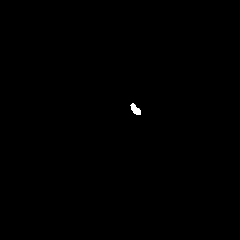

In [0]:
cv2_imshow(pred4[220,:,:,:].reshape(240,240)*255.0)

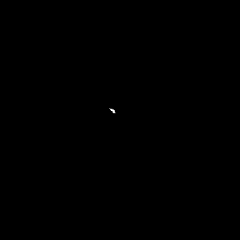

In [0]:
cv2_imshow(yt4[40,:,:,:].reshape(240,240)*255.0)

In [0]:
dice_pred4[40]

0

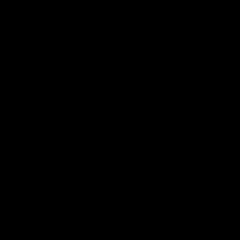

In [0]:
cv2_imshow(pred4[40,:,:,:].reshape(240,240)*255.0)

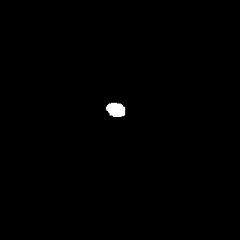

In [0]:
cv2_imshow(yt4[310,:,:,:].reshape(240,240)*255.0)

In [0]:
dice_pred4[310]

1

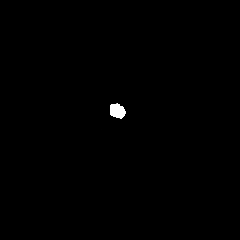

In [0]:
cv2_imshow(pred4[310,:,:,:].reshape(240,240)*255.0)

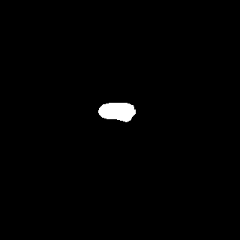

In [0]:
cv2_imshow(yt4[70,:,:,:].reshape(240,240)*255.0)

In [0]:
b.eval(dsc(yt4[70,:,:], pred4[70,:,:]))

0.9678872

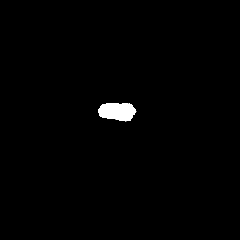

In [0]:
cv2_imshow(pred4[70,:,:,:].reshape(240,240)*255.0)

In [0]:
a=[]
for i in range(len(dice_pred4)):
  a.append(b.eval(dsc(yt4[i,:,:], pred4[i,:,:])))